## Generate Result Tables
- MCHAD
- CAC
- II
- Center Loss
- G-MCHAD
- G-Center
- G-CAC

In [25]:
import seaborn as sb
import matplotlib.pyplot as plt
from omegaconf import OmegaConf
import pandas as pd
from os.path import join

In [26]:
sb.set()
sb.set_style("whitegrid")
sb.set_context("paper")

In [27]:
# root folder for experiment run
root = "/home/ki/projects/work/mchad/logs/multiruns/complete/01/24/22-18:29:02/"

In [28]:
# map test cases
dataset_map = {
    "test_vs_uniformnoise": "Gauss",
    "test_vs_gaussiannoise": "Uniform",
    "test_vs_tinycrop": "Tiny Crop",
    "test_vs_tinyresize": "Tiny Resize",
    "test_vs_lsuncrop": "LSUN Crop",
    "test_vs_lsunresize": "LSUN Resize",
    "test_vs_textures": "Texture",
}

model_map = {
    "src.models.CAC": "CAC",
    "src.models.Softmax": "Softmax",
    "src.models.MCHAD": "MCHAD",
    "src.models.Center": "Center",
    "src.models.II": "II",
    "src.models.GCAC": "G-CAC",
    "src.models.GCenter": "G-Center",
}


train_dataset_map = {
    "src.datamodules.CIFAR10DataModule": "CIFAR10",
    "src.datamodules.SVHNDataModule": "SVHN",
    "src.datamodules.CIFAR100DataModule": "CIFAR100",
}

In [29]:
def convert(df, key="Distance", task="OSR"):
    """
    Get correct metrics from dataframe
    """
    df.rename(
        inplace=True,
        columns={
            "Accuracy/test": "Accuracy",
            f"{key}/{task}/AUROC/test": "AUROC",
            f"{key}/{task}/AUPR-IN/test": "AUPR-IN",
            f"{key}/{task}/AUPR-OUT/test": "AUPR-OUT",
            f"{key}/{task}/FPR@95TPR/test": "FPR95",
        },
    )

    return df

In [30]:
directories = [
    "./svhn/mchad/1",
    "./svhn/mchad/5",
    "./svhn/mchad/3",
    "./svhn/mchad/2",
    "./svhn/mchad/0",
    "./svhn/mchad/4",
    # "./svhn/center/1",
    # "./svhn/center/5",
    # "./svhn/center/3",
    # "./svhn/center/2",
    # "./svhn/center/0",
    # "./svhn/center/4",
    "./svhn/gmchad/1",
    "./svhn/gmchad/5",
    "./svhn/gmchad/3",
    "./svhn/gmchad/2",
    "./svhn/gmchad/0",
    "./svhn/gmchad/4",
    "./svhn/gcenter/1",
    "./svhn/gcenter/5",
    "./svhn/gcenter/3",
    "./svhn/gcenter/2",
    "./svhn/gcenter/0",
    "./svhn/gcenter/4",
    "./svhn/gcac/1",
    "./svhn/gcac/5",
    "./svhn/gcac/3",
    "./svhn/gcac/2",
    "./svhn/gcac/0",
    "./svhn/gcac/4",
    "./svhn/cac/1",
    "./svhn/cac/5",
    "./svhn/cac/3",
    "./svhn/cac/2",
    "./svhn/cac/0",
    "./svhn/cac/4",
    "./svhn/ii/1",
    "./svhn/ii/5",
    "./svhn/ii/3",
    "./svhn/ii/2",
    "./svhn/ii/0",
    "./svhn/ii/4",
    "./cifar100/mchad/1",
    "./cifar100/mchad/5",
    "./cifar100/mchad/3",
    "./cifar100/mchad/2",
    "./cifar100/mchad/0",
    "./cifar100/mchad/4",
    # "./cifar100/center/1",
    # "./cifar100/center/5",
    # "./cifar100/center/3",
    # "./cifar100/center/2",
    # "./cifar100/center/0",
    # "./cifar100/center/4",
    "./cifar100/gmchad/1",
    "./cifar100/gmchad/5",
    "./cifar100/gmchad/3",
    "./cifar100/gmchad/2",
    "./cifar100/gmchad/0",
    "./cifar100/gmchad/4",
    "./cifar100/gcenter/1",
    "./cifar100/gcenter/5",
    "./cifar100/gcenter/3",
    "./cifar100/gcenter/2",
    "./cifar100/gcenter/0",
    "./cifar100/gcenter/4",
    "./cifar100/gcac/1",
    "./cifar100/gcac/5",
    "./cifar100/gcac/3",
    "./cifar100/gcac/2",
    "./cifar100/gcac/0",
    "./cifar100/gcac/4",
    "./cifar100/cac/1",
    "./cifar100/cac/5",
    "./cifar100/cac/3",
    "./cifar100/cac/2",
    "./cifar100/cac/0",
    "./cifar100/cac/4",
    "./cifar100/ii/1",
    "./cifar100/ii/5",
    "./cifar100/ii/3",
    "./cifar100/ii/2",
    "./cifar100/ii/0",
    "./cifar100/ii/4",
    "./cifar10/mchad/1",
    "./cifar10/mchad/5",
    "./cifar10/mchad/3",
    "./cifar10/mchad/2",
    "./cifar10/mchad/0",
    "./cifar10/mchad/4",
    # "./cifar10/center/1",
    # "./cifar10/center/5",
    # "./cifar10/center/3",
    # "./cifar10/center/2",
    # "./cifar10/center/0",
    # "./cifar10/center/4",
    "./cifar10/gmchad/1",
    "./cifar10/gmchad/5",
    "./cifar10/gmchad/3",
    "./cifar10/gmchad/2",
    "./cifar10/gmchad/0",
    "./cifar10/gmchad/4",
    "./cifar10/gcenter/1",
    "./cifar10/gcenter/5",
    "./cifar10/gcenter/3",
    "./cifar10/gcenter/2",
    "./cifar10/gcenter/0",
    "./cifar10/gcenter/4",
    "./cifar10/gcac/1",
    "./cifar10/gcac/5",
    "./cifar10/gcac/3",
    "./cifar10/gcac/2",
    "./cifar10/gcac/0",
    "./cifar10/gcac/4",
    "./cifar10/cac/1",
    "./cifar10/cac/5",
    "./cifar10/cac/3",
    "./cifar10/cac/2",
    "./cifar10/cac/0",
    "./cifar10/cac/4",
    "./cifar10/ii/1",
    "./cifar10/ii/5",
    "./cifar10/ii/3",
    "./cifar10/ii/2",
    "./cifar10/ii/0",
    "./cifar10/ii/4",
]

In [31]:


def get_training_set(datamodule):
    target = datamodule["_target_"]
    d = train_dataset_map.get(target)

    if not d:
        if target == "src.datamodules.MultiDatamodule":
            d = train_dataset_map.get(datamodule["module1"]["_target_"])

    if not d:
        print(datamodule)
    else:
        print(d)

    return d


def load(path):
    local_df = []

    df = pd.read_csv(join(path, "results.csv"))
    metrics = pd.read_csv(join(path, "csv/version_0/metrics.csv"))
    config = OmegaConf.load(join(path, "config.yaml"))
    df["Dataset"] = get_training_set(config["datamodule"])
    df["Outliers"] = df["test_case_name"].apply(dataset_map.get)
    model = str(config["model"]["_target_"])

    if model == "src.models.CAC":
        df["Model"] = "CAC"
        df = convert(df, "Distance")
    elif model == "src.models.SoftMax":
        print("EB-OOD")
        df_ebm = df.copy(deep=True)
        df_ebm["Model"] = "EB-OOD"
        df_emb = convert(df_ebm, "EnergyBased")

        local_df.append(df_ebm)

        print("Softmax")
        df["Model"] = "Softmax"
        df = convert(df, "Softmax")

    elif model == "src.models.MCHAD":
        if config["model"]["weight_oe"] == 0.0:
            # print(f"Weight OE: {config['model']['weight_oe']}")
            df["Model"] = "MCHAD"
        else:
            print(f"Weight OE: {config['model']['weight_oe']}")
            df["Model"] = "G-MCHAD"

        df = convert(df)
    elif model == "src.models.Center":
        df["Model"] = "Center"
        df = convert(df, "Softmax")
    elif model == "src.models.IIModel":
        df["Model"] = "II"
        df = convert(df)
    elif model == "src.models.GCenter":
        df["Model"] = "G-Center"
        df = convert(df)
    elif model == "src.models.GCAC":
        df["Model"] = "G-CAC"
        df = convert(df)
    else:
        raise Exception(f"UNKNOWN: {model}")

    local_df.append(df)
    return config, pd.concat(local_df), metrics

In [32]:
dfs = []

for d in directories:
    # filter(lambda x: "center" not in x and "cifar100/softmax/" not in x and "mchad-o" not in x, directories):
    path = join(root, d)
    config, df, metrics = load(path)
    try:
        if df is not None:
            print(path)
            print(
                f"{df['Dataset'][0]}/{df['Model'][0]} -> {df['AUROC'].mean()} {len(df)}"
            )
            df = df[
                [
                    "Accuracy",
                    "AUROC",
                    "AUPR-IN",
                    "AUPR-OUT",
                    "FPR95",
                    "Dataset",
                    "Outliers",
                    "Model",
                ]
            ]
            dfs.append(df.copy())
    except:
        print("EXCEPTION WHILE LOADING")
        print(df.columns)

df = pd.concat(dfs)

SVHN
/home/ki/projects/work/mchad/logs/multiruns/complete/01/24/22-18:29:02/./svhn/mchad/1
SVHN/MCHAD -> 0.9843007922172546 8
SVHN
/home/ki/projects/work/mchad/logs/multiruns/complete/01/24/22-18:29:02/./svhn/mchad/5
SVHN/MCHAD -> 0.9816492199897766 8
SVHN
/home/ki/projects/work/mchad/logs/multiruns/complete/01/24/22-18:29:02/./svhn/mchad/3
SVHN/MCHAD -> 0.9753293480191912 8
SVHN
/home/ki/projects/work/mchad/logs/multiruns/complete/01/24/22-18:29:02/./svhn/mchad/2
SVHN/MCHAD -> 0.9772979617118835 8
SVHN
/home/ki/projects/work/mchad/logs/multiruns/complete/01/24/22-18:29:02/./svhn/mchad/0
SVHN/MCHAD -> 0.976820034640176 8
SVHN
/home/ki/projects/work/mchad/logs/multiruns/complete/01/24/22-18:29:02/./svhn/mchad/4
SVHN/MCHAD -> 0.977407021181924 8
SVHN
Weight OE: 0.0005
/home/ki/projects/work/mchad/logs/multiruns/complete/01/24/22-18:29:02/./svhn/gmchad/1
SVHN/G-MCHAD -> 0.9656964795930045 8
SVHN
Weight OE: 0.0005
/home/ki/projects/work/mchad/logs/multiruns/complete/01/24/22-18:29:02/./svh

In [33]:
df["AUROC"] = df["AUROC"].apply(lambda x: x * 100)
df["AUPR-IN"] = df["AUPR-IN"].apply(lambda x: x * 100)
df["AUPR-OUT"] = df["AUPR-OUT"].apply(lambda x: x * 100)
df["FPR95"] = df["FPR95"].apply(lambda x: x * 100)
df["Accuracy"] = df["Accuracy"].apply(lambda x: x * 100)

In [34]:
df = df.set_index(["Dataset", "Outliers", "Model"]).dropna()

df

Accuracy      AUROC    AUPR-IN   AUPR-OUT  \
Dataset Outliers    Model                                               
SVHN    Texture     MCHAD  95.132911  98.037082  99.544424  91.019201   
        Gauss       MCHAD  95.132911  99.486184  99.829328  97.311085   
        Uniform     MCHAD  95.132911  99.692041  99.902028  97.758019   
        Tiny Crop   MCHAD  95.132911  98.016149  99.262702  93.942463   
        Tiny Resize MCHAD  95.132911  97.962034  99.209750  93.886268   
...                              ...        ...        ...        ...   
CIFAR10 Uniform     II     31.150001  99.997860  99.998188  99.997640   
        Tiny Crop   II     31.150001  60.513997  57.905293  60.185969   
        Tiny Resize II     31.150001  61.730206  59.751660  60.037380   
        LSUN Crop   II     31.150001  72.616750  67.202836  74.511421   
        LSUN Resize II     31.150001  61.962932  60.648417  58.016962   

                               FPR95  
Dataset Outliers    Model             
SVHN    Texture     MCHAD   9.556738  
        Gauss       MCHAD   0.650000  
        Uniform     MCHAD   0.090000  
        Tiny Crop   MCHAD  11.450000  
        Tiny Resize MCHAD  11.380000  
...                              ...  
CIFAR10 Uniform     II      0.000000  
        Tiny Crop   II     88.789999  
        Tiny Resize II     90.230000  
        LSUN Crop   II     71.179998  
        LSUN Resize II     93.279999  

[756 rows x 5 columns]

In [35]:
from itertools import product
datasets = ["SVHN", "CIFAR10", "CIFAR100"]
# models = ["CAC", "II", "Center", "Softmax", "EB-OOD", "MCHAD", "G-MCHAD"]
models = ["MCHAD", "II", "CAC", "Center", "G-MCHAD", "G-Center", "G-CAC"]

t =  df.reset_index().groupby(by=["Dataset", "Model"]).agg(
        {
            "Accuracy": ["mean", "sem"],
            "AUROC": ["mean", "sem"],
            "AUPR-IN": ["mean", "sem"],
            "AUPR-OUT": ["mean", "sem"],
            "FPR95": ["mean", "sem"],
        }
    ).reindex(list(product(datasets, models)))

s = t.to_latex(
        float_format="%.2f",
        multirow=True,
        escape=False,
        label="tab:results",
        # bold_rows="True",
    )

repl = {
    "mean": "Mean",
    "sem": "$\\pm \sigma_{\\bar{x}}$",
    " MCHAD": " \\textbf{MCHAD (ours)}",
    "G-MCHAD": "\\textbf{G-MCHAD (ours)}",
    "G-Center": "\\textbf{G-Center (ours)}",
    "G-CAC": "\\textbf{G-CAC (ours)}",
}

for k, v in repl.items():
    s = s.replace(k, v)

print(s)

\begin{table}
\centering
\label{tab:results}
\begin{tabular}{llrrrrrrrrrr}
\toprule
         &       & \multicolumn{2}{l}{Accuracy} & \multicolumn{2}{l}{AUROC} & \multicolumn{2}{l}{AUPR-IN} & \multicolumn{2}{l}{AUPR-OUT} & \multicolumn{2}{l}{FPR95} \\
         &       &     Mean &  $\pm \sigma_{\bar{x}}$ &  Mean &  $\pm \sigma_{\bar{x}}$ &    Mean &  $\pm \sigma_{\bar{x}}$ &     Mean &  $\pm \sigma_{\bar{x}}$ &  Mean &  $\pm \sigma_{\bar{x}}$ \\
Dataset & Model &          &      &       &      &         &      &          &      &       &      \\
\midrule
\multirow{7}{*}{SVHN} & \textbf{MCHAD (ours)} &    95.07 & 0.02 & 97.88 & 0.15 &   99.26 & 0.06 &    92.09 & 0.52 & 10.42 & 0.98 \\
         & II &    11.03 & 0.23 & 56.66 & 3.77 &   77.14 & 2.30 &    36.70 & 3.62 & 85.62 & 4.67 \\
         & CAC &    95.33 & 0.03 & 93.52 & 0.49 &   95.71 & 0.43 &    84.46 & 0.94 & 24.22 & 1.89 \\
         & Center &      NaN &  NaN &   NaN &  NaN &     NaN &  NaN &      NaN &  NaN &   NaN &  NaN \\
  

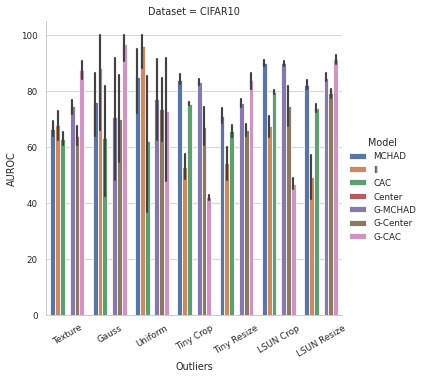

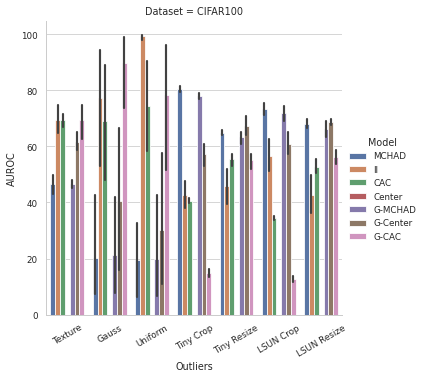

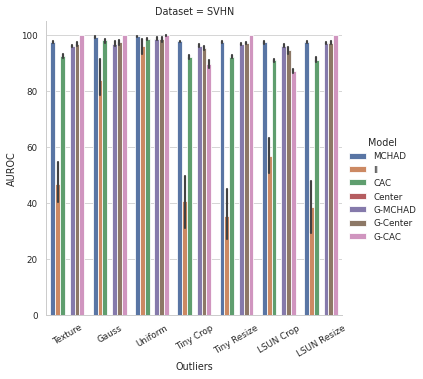

In [36]:
methods = ["MCHAD", "II", "CAC", "Center", "G-MCHAD", "G-Center", "G-CAC"]

for dataset in ["CIFAR10", "CIFAR100", "SVHN"]:
    g = sb.catplot(
        data=df.reset_index()[df.reset_index()["Dataset"] == dataset],
        x="Outliers",
        y="AUROC",
        kind="bar",
        hue="Model",
        col="Dataset",
        hue_order=methods
    )
    g.set_xticklabels(rotation=30)
    plt.savefig(f"out/single-auroc-{dataset}.png", dpi=300)
    plt.show()

In [37]:
tmp = df.reset_index().copy()
tmp = tmp[(tmp["Model"] == "MCHAD") | (tmp["Model"] == "G-MCHAD")]

print(
    tmp
    .groupby(by=["Dataset", "Model"])
    .agg(
        {
            "Accuracy": ["mean", "std"],
            "AUROC": ["mean", "std"],
            "AUPR-IN": ["mean", "std"],
            "AUPR-OUT": ["mean", "std"],
            "FPR95": ["mean", "std"],
        }
    )
    .to_html(
        float_format="%.2f",
        escape=False,
    )
)


<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th></th>
      <th colspan="2" halign="left">Accuracy</th>
      <th colspan="2" halign="left">AUROC</th>
      <th colspan="2" halign="left">AUPR-IN</th>
      <th colspan="2" halign="left">AUPR-OUT</th>
      <th colspan="2" halign="left">FPR95</th>
    </tr>
    <tr>
      <th></th>
      <th></th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
    </tr>
    <tr>
      <th>Dataset</th>
      <th>Model</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="2" valign="top">CIFAR10</th>
      <th>G-MCHAD</th>
      <td>84.87</td>
      <td>0.50</td>
      <td>79.33</td>
      <td>14.60</td>
      

In [38]:
from scipy.stats import ttest_ind

tmp = df.reset_index().copy()
# tmp = tmp[(tmp["Model"] == "MCHAD") | (tmp["Model"] == "G-MCHAD")]

for metric in ["Accuracy", "AUROC", "AUPR-IN", "AUPR-OUT", "FPR95"]:
    for dataset in ["SVHN", "CIFAR10", "CIFAR100"]:
        a = tmp[(tmp["Model"] == "CAC") & (tmp["Dataset"] == dataset)][metric]
        b = tmp[(tmp["Model"] == "MCHAD") & (tmp["Dataset"]== dataset)][metric]
        stat, p = ttest_ind(a,b, equal_var=False)
        print(f"{metric} {dataset} -> {p < 0.05} ")

Accuracy SVHN -> True 
Accuracy CIFAR10 -> True 
Accuracy CIFAR100 -> True 
AUROC SVHN -> True 
AUROC CIFAR10 -> True 
AUROC CIFAR100 -> False 
AUPR-IN SVHN -> True 
AUPR-IN CIFAR10 -> True 
AUPR-IN CIFAR100 -> False 
AUPR-OUT SVHN -> True 
AUPR-OUT CIFAR10 -> True 
AUPR-OUT CIFAR100 -> False 
FPR95 SVHN -> True 
FPR95 CIFAR10 -> True 
FPR95 CIFAR100 -> False 
